In [46]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# !conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor


# 4. Метирки качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [47]:
train = pd.read_csv('Kurs_project_task/train.csv')

In [48]:
train.drop(['LifeSquare', 'Healthcare_1', 'Id'], axis=1, inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   KitchenSquare  10000 non-null  float64
 4   Floor          10000 non-null  int64  
 5   HouseFloor     10000 non-null  float64
 6   HouseYear      10000 non-null  int64  
 7   Ecology_1      10000 non-null  float64
 8   Ecology_2      10000 non-null  object 
 9   Ecology_3      10000 non-null  object 
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Shops_2        10000 non-null  object 
 16  Price          10000 non-null  float64
dtypes: float64(6), int64(8), object(3)
memory usage: 1.

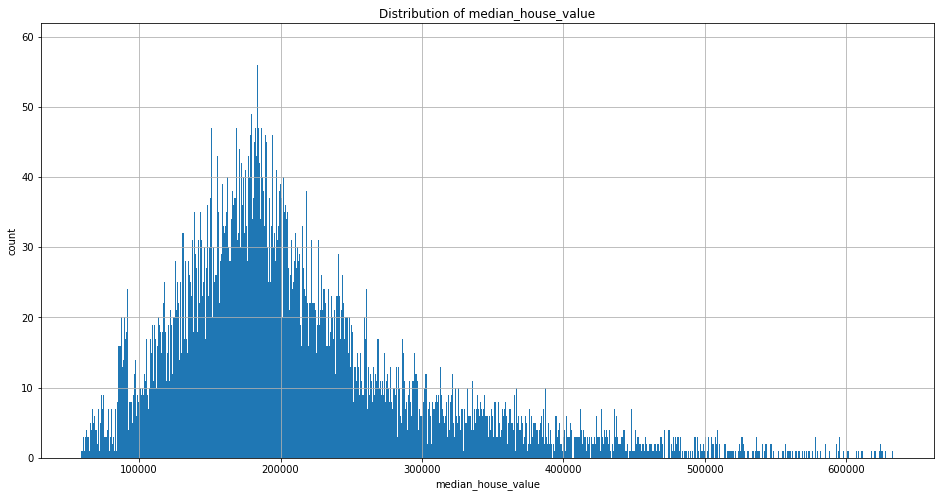

In [61]:
plt.figure(figsize = (16, 8))

train['Price'].hist(bins=1000)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.title('Distribution of median_house_value')
plt.show()

In [50]:
X = train.drop('Price', axis=1)
y = train['Price']

In [51]:
X.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,0,11,B
1,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,1,16,B
2,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B
3,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B
4,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2,4,B


In [52]:
X = pd.get_dummies(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

R2:	0.516
RMSE:	64620.06
MSE:	4175752144.098


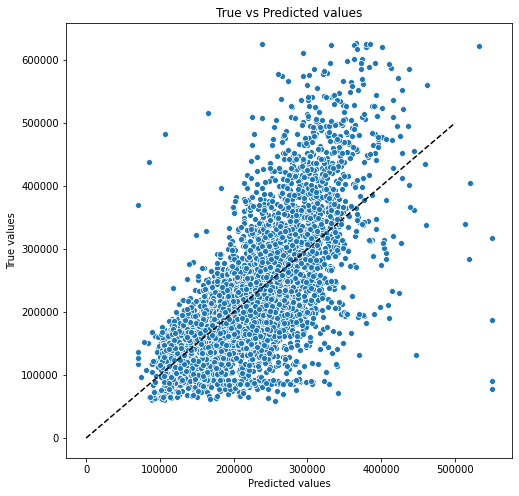

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпрецессинг
y_train_preds = np.clip(y_train_preds, a_min=70000, a_max=550000)

evaluate_preds(y_train, y_train_preds)

R2:	0.502
RMSE:	65455.28
MSE:	4284393670.972


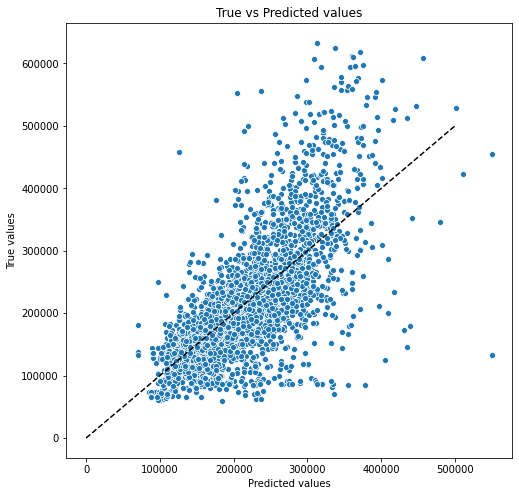

In [67]:
y_test_preds = lr_model.predict(X_test)

# Постпрецессинг
y_test_preds = np.clip(y_test_preds, a_min=70000, a_max=550000)

evaluate_preds(y_test, y_test_preds)

In [79]:
test = pd.read_csv('Kurs_project_task/test.csv')

In [80]:
test = pd.get_dummies(test)

In [81]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,NaN,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,3,NaN,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,87,4702.0,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,3,NaN,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1,NaN,0,0,0,1,0,1,1,0


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   2623 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Ecology_2_A    5000 non-null   uint8  
 17  Ecology_2_B    5000 non-null   uint8  
 18  Ecology_

In [83]:
test.drop(['Healthcare_1', 'LifeSquare', 'Id'], axis=1, inplace=True)

In [77]:
y_test2_preds = lr_model.predict(test)

# Постпрецессинг
#y_test2_preds = np.clip(y_test2_preds, a_min=70000, a_max=550000)

evaluate_preds(y_test, y_test2_preds)

ValueError: Found input variables with inconsistent numbers of samples: [3300, 5000]

In [29]:
np.where(y_test_preds > 1000000)

(array([485]),)

In [30]:
y_test_preds[485]

1186834.339273323

In [32]:
y_test[485]

180772.2181852068

In [34]:
X.iloc[485, :]

Id               8930.000000
DistrictId         87.000000
Rooms               1.000000
Square             34.789044
KitchenSquare       6.000000
Floor               5.000000
HouseFloor          9.000000
HouseYear        1978.000000
Ecology_1           0.100456
Social_1           43.000000
Social_2         7227.000000
Social_3            0.000000
Helthcare_2         1.000000
Shops_1             6.000000
Ecology_2_A         0.000000
Ecology_2_B         1.000000
Ecology_3_A         0.000000
Ecology_3_B         1.000000
Shops_2_A           1.000000
Shops_2_B           0.000000
Name: 485, dtype: float64

In [35]:
X.iloc[484,:]

Id               1116.000000
DistrictId         27.000000
Rooms               2.000000
Square             49.633605
KitchenSquare       7.000000
Floor              12.000000
HouseFloor         12.000000
HouseYear        1979.000000
Ecology_1           0.075424
Social_1           11.000000
Social_2         3097.000000
Social_3            0.000000
Helthcare_2         0.000000
Shops_1             0.000000
Ecology_2_A         0.000000
Ecology_2_B         1.000000
Ecology_3_A         0.000000
Ecology_3_B         1.000000
Shops_2_A           0.000000
Shops_2_B           1.000000
Name: 484, dtype: float64